In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("Data/fake reviews dataset.csv")

In [2]:
# Clean up the category names
old_cat = ['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5']
new_cat = ['Home and Kitchen', 'Sports and Outdoors', 'Electronics',
        'Movies and TV', 'Tools and Home Improvement',
        'Pet Supplies', 'Kindle Store', 'Books', 'Toys and Games',
        'Clothing Shoes and Jewelry']
df['category'].replace(to_replace=old_cat, value=new_cat, inplace=True)

# Remove any duplicate rows, then check for NA values for each column
df = df.drop_duplicates(subset='text_')
df['text_'].replace(".   .                   ", np.nan, inplace=True)
df.dropna(subset=['text_'], inplace=True)

print(df.isnull().sum())

# Rename columns so that they are more descriptive
colnames_dict = {"label": "type", "text_": "comments"}
df.rename(columns=colnames_dict, inplace=True)

# Map the type column to numeric/boolean values:
  # OR (Original reviews, presumably human-created and authentic) = 0
  # CG (Computer-generated fake reviews) = 1

type_dict_map = {'OR': 0 ,'CG':1}
df['type'] = df['type'].map(type_dict_map)
df.head()

category    0
rating      0
label       0
text_       0
dtype: int64


,category,rating,type,comments
0,Home and Kitchen,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home and Kitchen,5.0,1,"love it, a great upgrade from the original. I..."
2,Home and Kitchen,5.0,1,This pillow saved my back. I love the look and...
3,Home and Kitchen,1.0,1,"Missing information on how to use it, but it i..."
4,Home and Kitchen,5.0,1,Very nice set. Good quality. We have had the s...


Number of type 0 reviews: 20215
Number of type 1 reviews: 20196


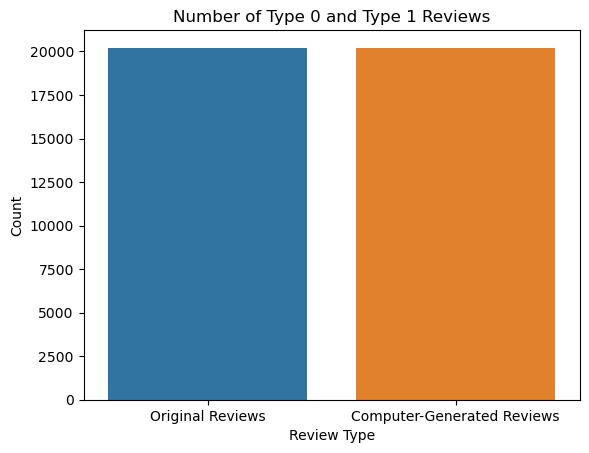

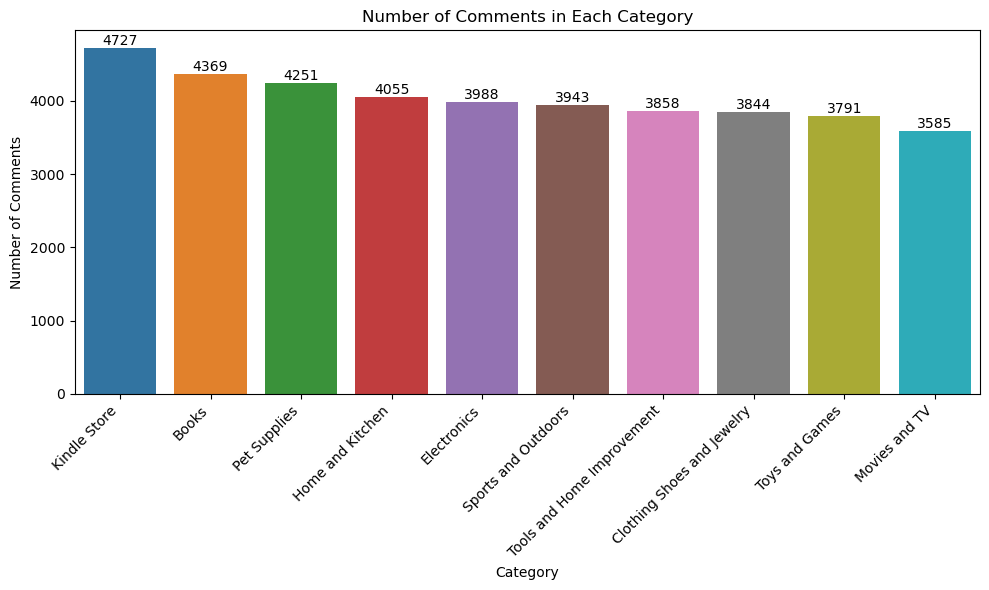

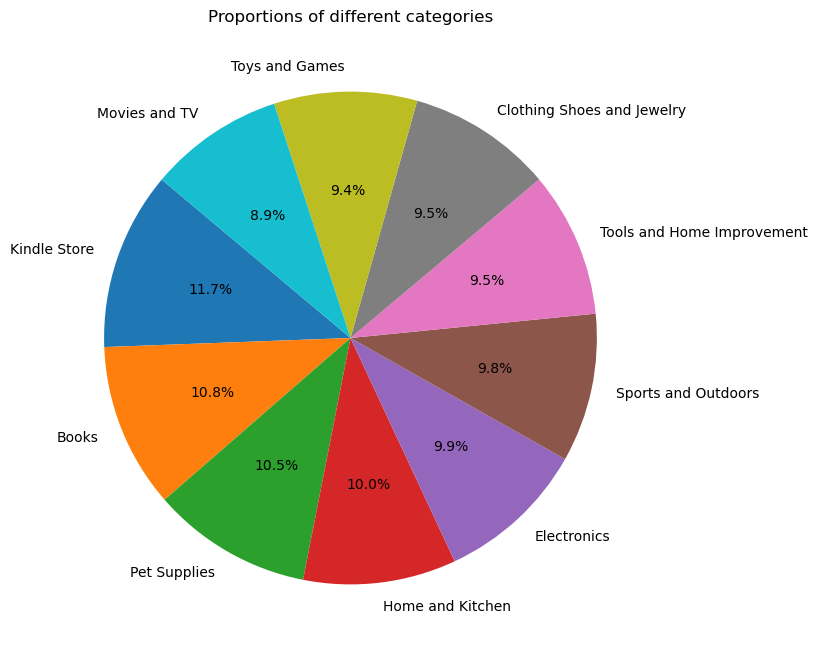

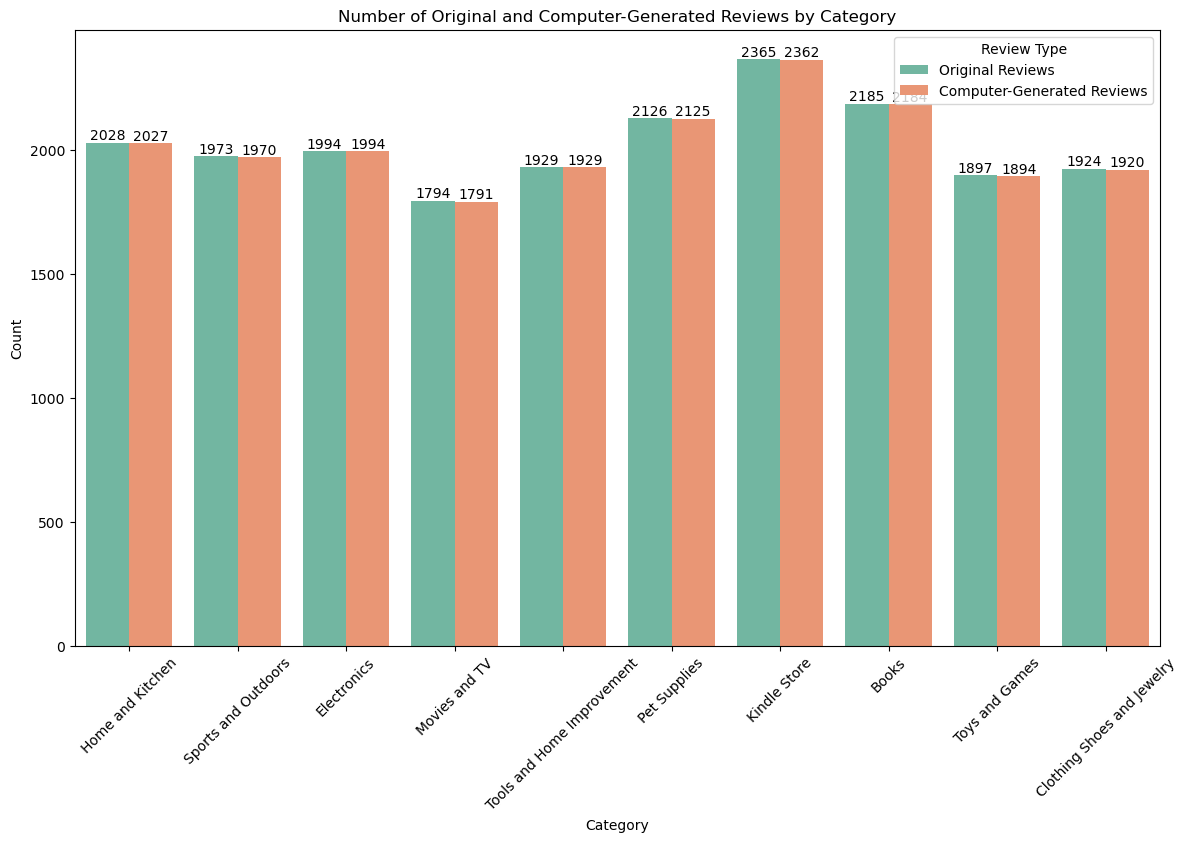

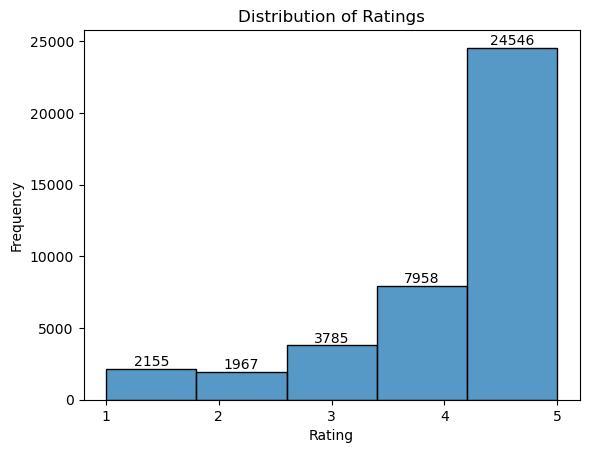

rating  type
1.0     0        1092
        1        1063
2.0     0        1005
        1         962
3.0     0        1834
        1        1951
4.0     0        4045
        1        3913
5.0     0       12239
        1       12307
dtype: int64


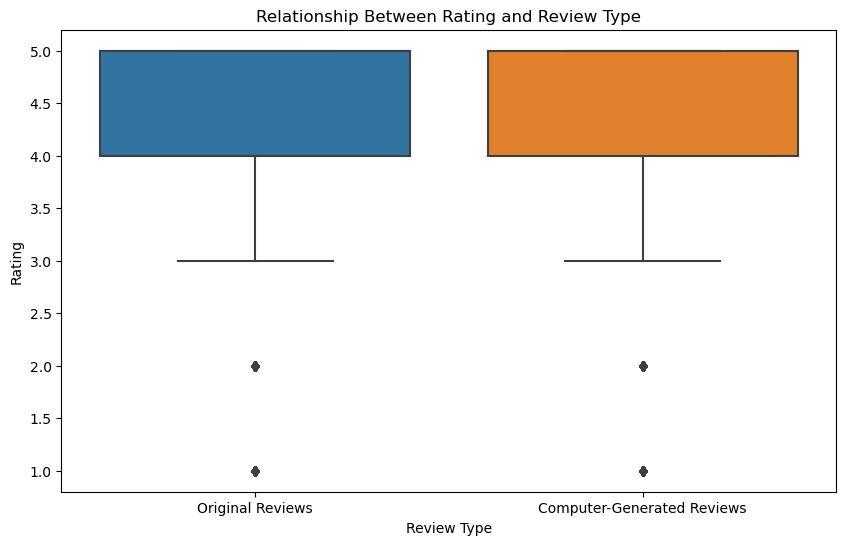

In [3]:
# Print the review counts for each types
type_counts = df['type'].value_counts()
print("Number of type 0 reviews:", type_counts[0])
print("Number of type 1 reviews:", type_counts[1])

#Numbers of review in each type
sns.countplot(data=df,x='type')
plt.title('Number of Type 0 and Type 1 Reviews')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Original Reviews', 'Computer-Generated Reviews'])
plt.show()

# Numbers of comment in each category
category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Comments in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom')
plt.show()

#Proportions of different categories
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportions of different categories')
plt.ylabel('')
plt.show()

#Types of review in each category
plt.figure(figsize=(14, 8))
bars =sns.countplot(data=df, x='category', hue='type', palette='Set2')
plt.title('Number of Original and Computer-Generated Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Review Type', labels=['Original Reviews', 'Computer-Generated Reviews'])
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom')
plt.show()

#Rating distribution
hist=sns.histplot(data=df, x='rating', bins=5,)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
for p in hist.patches:
    hist.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='bottom')
plt.show()

# the number of different types reviews by rating
review_counts = df.groupby(['rating', 'type']).size()
print(review_counts)

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=df)
plt.title('Relationship Between Rating and Review Type')
plt.xlabel('Review Type')
plt.ylabel('Rating')
plt.xticks([0, 1], ['Original Reviews', 'Computer-Generated Reviews'])

plt.show()


In [4]:
df['category'].unique()

array(['Home and Kitchen', 'Sports and Outdoors', 'Electronics',
       'Movies and TV', 'Tools and Home Improvement', 'Pet Supplies',
       'Kindle Store', 'Books', 'Toys and Games',
       'Clothing Shoes and Jewelry'], dtype=object)

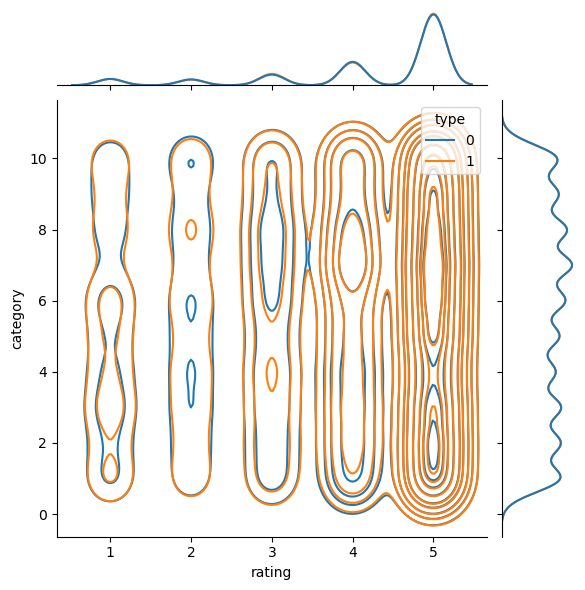

In [5]:
df2 = df
dict_map = {'Home and Kitchen': 1, 'Sports and Outdoors': 2, 'Electronics': 3,
       'Movies and TV': 4, 'Tools and Home Improvement': 5, 'Pet Supplies': 6,
       'Kindle Store': 7, 'Books': 8, 'Toys and Games': 9, 'Clothing Shoes and Jewelry': 10}
df2['category'] = df['category'].replace(dict_map) 

sns.jointplot(data=df2, x='rating', y='category', hue='type', kind='kde')

In [6]:

target_var  = 'type'
feature_var = [ 'rating', 'comments']
X = df[feature_var]
y = df[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print("X_train shape:", X_train.shape)
print(X_train.head())
print("X_test shape:", X_test.shape)
print(X_test.head())
print("y_train shape:", y_train.shape)
print(y_train[:5])
print("y_test shape:", y_test.shape)
print(y_test[:5])

X_train shape: (28287, 2)
       rating                                           comments
7569      5.0  Great Cooler. Cheaper than other high end cool...
30086     4.0  Wow i can't believe Richards left me hanging n...
28669     2.0  Just didn't hold my interest. I finished it, b...
28491     4.0  it's a tough subject, this book has the potent...
3986      4.0  This is a decent storage rack. The only proble...
X_test shape: (12124, 2)
       rating                                           comments
27462     2.0  'Name that Doggy!' Because it was an easy read...
4476      5.0  These are good targets to add a bit of realism...
38652     5.0  I love this watch!  It has the wide band which...
11314     3.0  It does as advertised, mostly. It's on the bug...
21592     5.0  I have 2 boxers that I felt needed a little wa...
y_train shape: (28287, 1)
[[0]
 [0]
 [0]
 [1]
 [1]]
y_test shape: (12124, 1)
[[1]
 [0]
 [1]
 [0]
 [0]]


# Logistic Regression

In [7]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# GridSearch for hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


tfidf = TfidfVectorizer()
logreg = LogisticRegression()

# Transform comment to tfidf
X_train_tfidf = tfidf.fit_transform(X_train['comments'])
X_test_tfidf = tfidf.fit_transform(X_test['comments'])

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()


param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],  # Inverse of regularization strength
    'class_weight': [None, 'balanced'], # Weights associated with classes
    'penalty': ['l1', 'l2', 'elasticnet', None], 
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best hyperparameters: {'C': 10.0, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.9053627506169997


c:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Logistic Regression with 'comments' column, dflt solver (lbfgs)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a pipeline to vectorize the text data and then apply the logistic regression model
pipeline_log = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic', LogisticRegression(solver='sag', C= 10.0, penalty='l2', class_weight='balanced'))
])

# Perform cross-validation and print the scores
cv_scores_log = cross_val_score(pipeline_log, X_train['comments'], y_train.ravel(), cv=5)  # Choose appropriate cv value
print("Cross-Validation Scores:", cv_scores_log)

# Fit pipeline to training data and make predictions
pipeline_log.fit(X_train['comments'], y_train.ravel())
predictions_log = pipeline_log.predict(X_test['comments'])


Cross-Validation Scores: [0.90509014 0.90738777 0.90489659 0.9010076  0.90277532]


In [10]:
## Print model evaluation metrics
# Calculate accuracy
acc_log = metrics.accuracy_score(predictions_log, y_test.ravel())
print('Accuracy of logistic regression model:', acc_log)

# Print classification report and confusion matrix
confMatrix_log = metrics.confusion_matrix(y_test, predictions_log)
print(metrics.classification_report(y_test, predictions_log))
print(confMatrix_log)

Accuracy of logistic regression model: 0.9063840316727153
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6042
           1       0.91      0.90      0.91      6082

    accuracy                           0.91     12124
   macro avg       0.91      0.91      0.91     12124
weighted avg       0.91      0.91      0.91     12124

[[5488  554]
 [ 581 5501]]


In [11]:
# sensitivity
sensitivity_log = confMatrix_log[0,0]/(confMatrix_log[0,0]+confMatrix_log[0,1])
print('Sensitivity [log reg model] : ', sensitivity_log)

# specificity
specificity_log = confMatrix_log[1,1]/(confMatrix_log[1,0]+confMatrix_log[1,1])
print('Specificity [log reg model] : ', specificity_log)

Sensitivity [log reg model] :  0.9083085071168487
Specificity [log reg model] :  0.9044722130878


In [12]:
# Logistic Regression with 'comments' and 'rating' columns, solver = 'sag'
from sklearn.compose import ColumnTransformer

# Create a pipeline for TF-IDF vectorization of the 'comments' column
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())
])

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor_log = ColumnTransformer(
    transformers=[
        ('comments_tfidf', tfidf_pipeline, 'comments'),  # Apply TF-IDF to 'comments' column
        ('passthrough', 'passthrough', ['rating'])  # Pass through 'type' column as it is
    ],
    remainder='drop'  # Drop any columns not specified in the transformers
)

# Create the final pipeline by combining preprocessor and logistic regression
pipeline_log2 = Pipeline([
    ('preprocessor', preprocessor_log),
    ('logistic', LogisticRegression(solver='sag', C= 10.0, penalty='l2', class_weight='balanced'))
])

# Perform cross-validation and print the scores
cv_scores_log2 = cross_val_score(pipeline_log2, X_train, y_train.ravel(), cv=5)
print("Cross-Validation Scores:", cv_scores_log2)

# Fit pipeline to training data and make predictions
pipeline_log2.fit(X_train, y_train.ravel())
predictions_log2 = pipeline_log2.predict(X_test)


c:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Scores: [0.90632732 0.90615058 0.90560368 0.90065406 0.90224501]


c:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
## Print model evaluation metrics
# Calculate accuracy
acc_log2 = metrics.accuracy_score(predictions_log2, y_test.ravel())
print('Accuracy of logistic regression model:', acc_log2)

# Print classification report and confusion matrix
confMatrix_log2 = metrics.confusion_matrix(y_test, predictions_log2)
print(metrics.classification_report(y_test, predictions_log2))
print(confMatrix_log2)


# sensitivity
sensitivity_log2 = confMatrix_log2[0,0]/(confMatrix_log2[0,0]+confMatrix_log2[0,1])
print('Sensitivity [log reg model] : ', sensitivity_log2)

# specificity
specificity_log2 = confMatrix_log2[1,1]/(confMatrix_log2[1,0]+confMatrix_log2[1,1])
print('Specificity [log reg model] : ', specificity_log2)

Accuracy of logistic regression model: 0.9072088419663478
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6042
           1       0.91      0.91      0.91      6082

    accuracy                           0.91     12124
   macro avg       0.91      0.91      0.91     12124
weighted avg       0.91      0.91      0.91     12124

[[5493  549]
 [ 576 5506]]
Sensitivity [log reg model] :  0.9091360476663356
Specificity [log reg model] :  0.905294311081881


# Multinomial Naive Bayes

In [20]:
# Import
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# GridSearch for hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


tfidf = TfidfVectorizer()
multiNB = MultinomialNB()

# Transform comment to tfidf
X_train_tfidf = tfidf.fit_transform(X_train['comments'])
X_test_tfidf = tfidf.fit_transform(X_test['comments'])

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()


param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
    'fit_prior': [True, False],  # Whether to learn class prior probabilities or not
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=multiNB, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best hyperparameters: {'alpha': 0.1, 'fit_prior': False}
Best cross-validation score: 0.8675360994143025


In [22]:
# Create a pipeline to vectorize the text data and then apply the multinomial NB model
pipeline_multiNB = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('Multinomial NB', MultinomialNB(alpha=0.1, fit_prior=True))
])

# Perform cross-validation and print the scores
cv_score_multiNB = cross_val_score(pipeline_multiNB, X_train['comments'], y_train.ravel(), cv=5)  # Choose appropriate cv value
print("Cross-Validation Scores:", cv_score_multiNB)

# Fit pipeline to training data and make predictions
pipeline_multiNB.fit(X_train['comments'], y_train.ravel())
predictions_multiNB = pipeline_multiNB.predict(X_test['comments'])

# Print classification report and confusion matrix
confMatrix_mulitNB = confusion_matrix(y_test, predictions_multiNB)
acc_multiNB = metrics.accuracy_score(predictions_multiNB, y_test.ravel())

print('Accuracy of multi NB model:', acc_multiNB)
print(classification_report(y_test, predictions_multiNB))
print(confMatrix_mulitNB)

# sensitivity
sensitivity_multiNB = confMatrix_mulitNB[0,0]/(confMatrix_mulitNB[0,0]+confMatrix_mulitNB[0,1])
print('Sensitivity [multi NB model] : ', sensitivity_multiNB)

# specificity
specificity_multiNB = confMatrix_mulitNB[1,1]/(confMatrix_mulitNB[1,0]+confMatrix_mulitNB[1,1])
print('Specificity [multi NB model] : ', specificity_multiNB)

Cross-Validation Scores: [0.87027218 0.87239307 0.86759767 0.86370868 0.87060279]
Accuracy of multi NB model: 0.8748762784559552
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      6042
           1       0.86      0.90      0.88      6082

    accuracy                           0.87     12124
   macro avg       0.88      0.87      0.87     12124
weighted avg       0.88      0.87      0.87     12124

[[5135  907]
 [ 610 5472]]
Sensitivity [multi NB model] :  0.8498841443230718
Specificity [multi NB model] :  0.8997040447221308


In [34]:
# Multinomial NB with 'comments' and 'rating' columns
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor_log = ColumnTransformer(
    transformers=[
        ('comments_tfidf', tfidf_pipeline, 'comments'),  # Apply TF-IDF to 'comments' column
        ('passthrough', 'passthrough', ['rating'])  # Pass through 'type' column as it is
    ],
    remainder='drop'  # Drop any columns not specified in the transformers
)

# Create the final pipeline by combining preprocessor and multinomial NB
pipeline_multiNB2 = Pipeline([
    ('preprocessor', preprocessor_log),
    ('Multinomial NB', MultinomialNB(alpha=0.1, fit_prior=True))
])

# Perform cross-validation and print the scores
cv_scores_multiNB2 = cross_val_score(pipeline_multiNB2, X_train, y_train.ravel(), cv=5)

print("Cross-Validation Scores:", cv_scores_multiNB2)

# Fit pipeline to training data and make predictions
pipeline_multiNB2.fit(X_train, y_train.ravel())
predictions_multiNB2 = pipeline_multiNB2.predict(X_test)
acc_multiNB2 = metrics.accuracy_score(predictions_multiNB2, y_test.ravel())

print('Accuracy of multi NB model:', acc_multiNB2)
# Print classification report and confusion matrix
confMatrix_multiNB2 = confusion_matrix(y_test, predictions_multiNB2)
print(classification_report(y_test, predictions_multiNB2))
print(confMatrix_multiNB2)

# sensitivity
sensitivity_multiNB2 = confMatrix_multiNB2[0,0]/(confMatrix_multiNB2[0,0]+confMatrix_multiNB2[0,1])
print('Sensitivity [multi NB model] : ', sensitivity_multiNB2)

# specificity
specificity_multiNB2 = confMatrix_multiNB2[1,1]/(confMatrix_multiNB2[1,0]+confMatrix_multiNB2[1,1])
print('Specificity [multi NB model] : ', specificity_multiNB2)

Cross-Validation Scores: [0.8621421  0.87168611 0.86070355 0.85964292 0.86883507]
Accuracy of multi NB model: 0.8703398218409766
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      6042
           1       0.84      0.91      0.88      6082

    accuracy                           0.87     12124
   macro avg       0.87      0.87      0.87     12124
weighted avg       0.87      0.87      0.87     12124

[[5021 1021]
 [ 551 5531]]
Sensitivity [multi NB model] :  0.8310162197947699
Specificity [multi NB model] :  0.9094048010522854


# Random Forest

In [24]:
# Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
# GridSearch for hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


tfidf = TfidfVectorizer()
randomForest = RandomForestClassifier()

# Transform comment to tfidf
X_train_tfidf = tfidf.fit_transform(X_train['comments'])
X_test_tfidf = tfidf.fit_transform(X_test['comments'])

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()


param_grid = {
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}


# Create GridSearchCV
grid_search = GridSearchCV(estimator=randomForest, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



c:\Users\Chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Chris\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Best hyperparameters: {'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.8869443057781871


In [32]:
# Random Forest
# Create a pipeline to vectorize the text data and then apply the randomforest model
pipeline_rf = Pipeline([  
    ('tfidf', TfidfVectorizer()),
    ('RandomForest', RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 5))
])

# Perform cross-validation and print the scores
cv_score_rf = cross_val_score(pipeline_rf, X_train['comments'], y_train.ravel(), cv=5)  # Choose appropriate cv value
print("Cross-Validation Scores:", cv_score_rf)

# Fit pipeline to training data and make predictions
pipeline_rf.fit(X_train['comments'], y_train.ravel())
predictions_rf = pipeline_rf.predict(X_test['comments'])
acc_rf = metrics.accuracy_score(predictions_rf, y_test.ravel())

print('Accuracy of Random forest model:', acc_rf)
# Print classification report and confusion matrix
confMatrix_rf = confusion_matrix(y_test, predictions_rf)
print(classification_report(y_test, predictions_rf))
print(confMatrix_rf)

# sensitivity
sensitivity_rf = confMatrix_rf[0,0]/(confMatrix_rf[0,0]+confMatrix_rf[0,1])
print('Sensitivity [Random forest model] : ', sensitivity_rf)

# specificity
specificity_rf = confMatrix_rf[1,1]/(confMatrix_rf[1,0]+confMatrix_rf[1,1])
print('Specificity [Random forest model] : ', specificity_rf)

Cross-Validation Scores: [0.88317427 0.88388123 0.87431501 0.87290083 0.88333039]
Accuracy of Random forest model: 0.8889805344770703
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      6042
           1       0.87      0.91      0.89      6082

    accuracy                           0.89     12124
   macro avg       0.89      0.89      0.89     12124
weighted avg       0.89      0.89      0.89     12124

[[5226  816]
 [ 530 5552]]
Sensitivity [Random forest model] :  0.8649453823237339
Specificity [Random forest model] :  0.9128576126274252


In [28]:
# Random Forest with 'comments' and 'rating' columns
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor_log = ColumnTransformer(
    transformers=[
        ('comments_tfidf', tfidf_pipeline, 'comments'),  # Apply TF-IDF to 'comments' column
        ('passthrough', 'passthrough', ['rating'])  # Pass through 'type' column as it is
    ],
    remainder='drop'  # Drop any columns not specified in the transformers
)

pipeline_rf2 = Pipeline([  
    ('preprocessor', preprocessor_log),
    ('RandomForest', RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 5))
])

# Perform cross-validation and print the scores
cv_scores_rf2 = cross_val_score(pipeline_rf2, X_train, y_train.ravel(), cv=5)

print("Cross-Validation Scores:", cv_scores_rf2)

# Fit pipeline to training data and make predictions
pipeline_rf2.fit(X_train, y_train.ravel())
predictions_rf2 = pipeline_rf2.predict(X_test)
acc_rf2 = metrics.accuracy_score(predictions_rf2, y_test.ravel())

print('Accuracy of multi NB model:', acc_rf2)
# Print classification report and confusion matrix
confMatrix_rf2 = confusion_matrix(y_test, predictions_rf2)
print(classification_report(y_test, predictions_rf2))
print(predictions_rf2)

# sensitivity
sensitivity_rf2 = confMatrix_rf2[0,0]/(confMatrix_rf2[0,0]+confMatrix_rf2[0,1])
print('Sensitivity [multi NB model] : ', sensitivity_rf2)

# specificity
specificity_rf2 = confMatrix_rf2[1,1]/(confMatrix_rf2[1,0]+confMatrix_rf2[1,1])
print('Specificity [multi NB model] : ', specificity_rf2)

Cross-Validation Scores: [0.88299753 0.8854719  0.88050203 0.87749691 0.88297684]
Accuracy of multi NB model: 0.8897228637413395
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      6042
           1       0.88      0.91      0.89      6082

    accuracy                           0.89     12124
   macro avg       0.89      0.89      0.89     12124
weighted avg       0.89      0.89      0.89     12124

[1 0 1 ... 0 0 0]
Sensitivity [multi NB model] :  0.8700761337305528
Specificity [multi NB model] :  0.9092403814534693


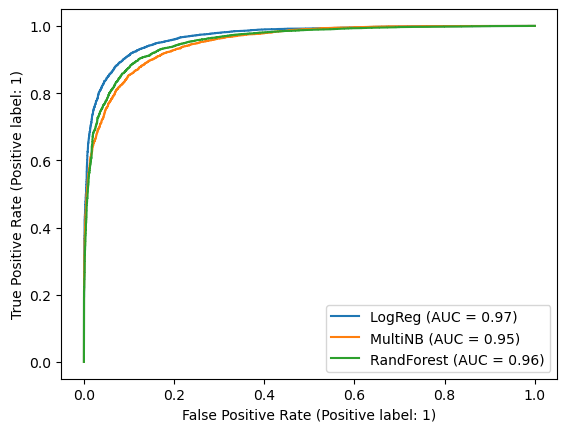

In [27]:
# Comparing ROC curves of log reg with multi NB without Ratings column
logDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_log, X_test['comments'], y_test.ravel(), name='LogReg')
multiNBDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_multiNB, X_test['comments'], y_test.ravel(), ax=logDisplay.ax_, name='MultiNB')
rfDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_rf, X_test['comments'], y_test.ravel(), ax=logDisplay.ax_, name='RandForest')

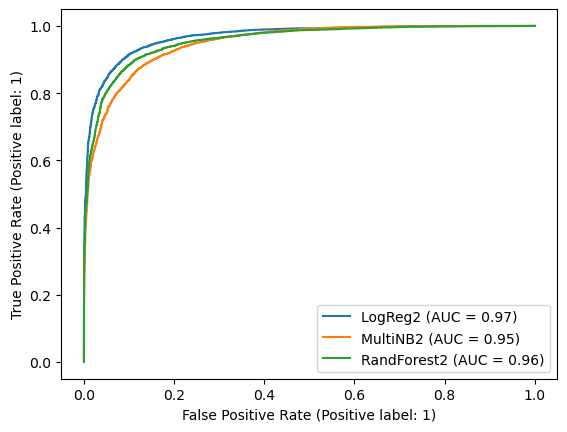

In [31]:
# Comparing ROC curves of log reg with multi NB with Ratings column
logDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_log2, X_test[['comments', 'rating']], y_test.ravel(), name='LogReg2')
multiNBDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_multiNB2, X_test[['comments', 'rating']], y_test.ravel(), ax=logDisplay.ax_, name='MultiNB2')
rfDisplay = metrics.RocCurveDisplay.from_estimator(pipeline_rf2, X_test[['comments', 'rating']], y_test.ravel(), ax=logDisplay.ax_, name='RandForest2')
